# URL : https://school.programmers.co.kr/learn/courses/30/lessons/42583

## 다리를 지나는 트럭

## 모범 답안

In [50]:
import collections

DUMMY_TRUCK = 0


class Bridge(object):

    def __init__(self, length, weight):
        self._max_length = length
        self._max_weight = weight
        self._queue = collections.deque()
        self._current_weight = 0

    def push(self, truck):
        next_weight = self._current_weight + truck
        if next_weight <= self._max_weight and len(self._queue) < self._max_length:
            self._queue.append(truck)
            self._current_weight = next_weight
            return True
        else:
            return False

    def pop(self):
        item = self._queue.popleft()
        self._current_weight -= item
        return item

    def __len__(self):
        return len(self._queue)

    def __repr__(self):
        return 'Bridge({}/{} : [{}])'.format(self._current_weight, self._max_weight, list(self._queue))


def solution(bridge_length, weight, truck_weights):
    bridge = Bridge(bridge_length, weight)
    trucks = collections.deque(w for w in truck_weights)

    for _ in range(bridge_length):
        bridge.push(DUMMY_TRUCK)

    count = 0
    while trucks:
        bridge.pop()

        if bridge.push(trucks[0]):
            trucks.popleft()
        else:
            bridge.push(DUMMY_TRUCK)

        count += 1

    while bridge:
        bridge.pop()
        count += 1

    return count


def main():
    print(solution(2, 10, [7, 4, 5, 6]), 8)
    print(solution(100, 100, [10]), 101)
    print(solution(100, 100, [10, 10, 10, 10, 10, 10, 10, 10, 10, 10]), 110)


if __name__ == '__main__':
    main()

8 8
101 101
110 110


## 조성민

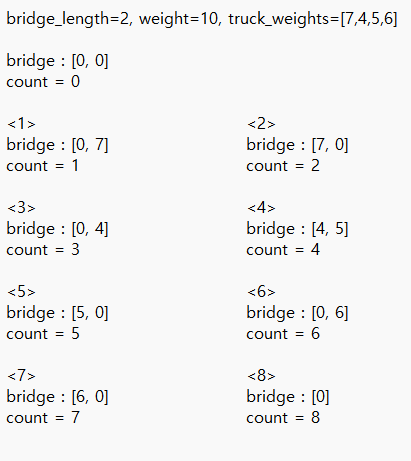

### 시간 초과가 난다...
마음이 너무 아프다

In [44]:
def solution(bridge_length, weight, truck_weights):
    bridge = [0] * bridge_length
    count = 0
    while bridge:
        bridge.pop(0)
        count += 1
        
        if truck_weights:
            if sum(bridge) + truck_weights[0] <= weight:
                truck = truck_weights.pop(0)
                bridge.append(truck)
                
            else:
                bridge.append(0)
    
    return count
    
    
    
print(solution(bridge_length=2, weight=10, truck_weights=[7,4,5,6]))
print(solution(100, 100, [10]))
print(solution(100, 100, [10,10,10,10,10,10,10,10,10,10]))

8
101
110


### 해결하기 위해서는 계산량을 줄여야 한다.


리스트에 append, pop하는 과정에는 그리 큰 연산이 일어나지 않는다.
stack, queue 를 사용해서 0을 pop하고 append하는 과정은 그리 문제가 되지 않는다.

count 1씩 더하는건 당연히 아니다.

도대체 그럼 뭘까?

반복문의 문제일까? 하지만 딱히 문제될건 없다.

sum함수의 문제일까? ㅁㅊ 진짜 된다

아무래도 sum이 문제인 것 같다. 필요없는 0값도 계속 더해주는 것에서 연산량이 폭발한 듯 하다.

이를 해결하기 위해 bridge_weight 변수를 사용하여 0을 더하는 필요없는 연산을 제거함

In [49]:
def solution(bridge_length, weight, truck_weights):
    bridge = [0] * bridge_length
    count = 0
    bridge_weight = 0
    
    while bridge:
        if bridge[0] != 0:
            bridge_weight -= bridge[0]
        
        bridge.pop(0)
        count += 1
        
        if truck_weights:
            if bridge_weight + truck_weights[0] <= weight:
                truck = truck_weights.pop(0)
                bridge.append(truck)
                bridge_weight += truck
                
            else:
                bridge.append(0)
    
    return count
    
    
    
print(solution(bridge_length=2, weight=10, truck_weights=[7,4,5,6]))
print(solution(100, 100, [10]))
print(solution(100, 100, [10,10,10,10,10,10,10,10,10,10]))

8
101
110


## 심경민

In [ ]:
from collections import deque # 블로그 참조해서 deque가 간편하다는 것을 알았습니다 ^^!
def solution(bridge_length, weight, truck_weights):
    time = 0
    queue = deque([0]*bridge_length) # 다리만들기~
    truck = deque(truck_weights)
    
    while queue:
        time += 1  # 예시 보니까 다리 1칸에 1초 인듯 
        queue.popleft() # 가장 앞에는 지나가세용~
        if truck:
            if sum(queue) + truck[0] <= weight:  # 이미 다리 위에 올라가있는 트럭 + 들어갈 트럭 <= 한계
                queue.append(truck.popleft())  # 한계 미만이면 트럭 넣기
            else:
                queue.append(0)  # 아니면 그냥 0으로 넣고 지나가도록 
                
    return time

# 내가 생각한 것
# 일단 배경 (다리)가 존재 해야 하기 때문에 다리를 생성함
# 이후에 트럭이 올라간 무게 즉 한계가 중요해서 if문 설정.
# [0,0] > [0,7] > [7,0] > [0,4] > [4,5] 이런 식 
# 이것을 구현하기 위해 for문을 사용하고자 햇으나 이중for문이 되고 너무 복잡해져서 생각을 정리하기가 힘듦
# 코드 계속 수정하다가 점점 산으로 가서 다른 블로그 참조함. ^^; 그냥 이해만 하고 제가 다시 이해한 바탕으로 쓰긴했습니다.
# 이중 for문 하다가 포기한건 이미지 첨부합니다

## 이선우

In [7]:
def solution(bridge_length, weight, truck_weights):
    answer = 0 #걸리는 시간
    b=[0]*bridge_length #공간생성
    
    while b:
        b.pop(0)
        answer+=1 #트럭이 다리를 지날때 1초 소요
        if truck_weights:
            if truck_weights[0] + sum(b) <= weight: #1번으로 접근
                b.append(truck_weights.pop(0))
            else:
                b.append(0) #무게땜에 들어가지 못한 트럭을 그냥 0으로 표현
    return answer


print(solution(bridge_length=2, weight=10, truck_weights=[7,4,5,6]))
print(solution(100, 100, [10]))
print(solution(100, 100, [10,10,10,10,10,10,10,10,10,10]))

## 이민우

In [5]:
def solution(bridge_length, weight, truck_weights):
    q=[0]*bridge_length
    sec=0
    while q:
        sec+=1
        q.pop(0)
        #뒤에 오는 대기트럭이 하중을 견디면 팝한 값을 q에 추가 하중을 견디지못하면 0을 추가하여 다리위에 트럭이 pop되어 하중을 견딜 수 있는 다리가 될때까지 카운트 상승 후 다시 다음트럭과 비교후 같은과정 반복
        if truck_weights:
            if sum(q)+truck_weights[0]<=weight:
                q.append(truck_weights.pop(0))
            else:
                q.append(0)
    return sec


print(solution(bridge_length=2, weight=10, truck_weights=[7,4,5,6]))
print(solution(100, 100, [10]))
print(solution(100, 100, [10,10,10,10,10,10,10,10,10,10]))

## Test

In [51]:
print(solution(bridge_length=2, weight=10, truck_weights=[7,4,5,6]))
print(solution(100, 100, [10]))
print(solution(100, 100, [10,10,10,10,10,10,10,10,10,10]))

8
101
110


# URL : https://school.programmers.co.kr/learn/courses/30/lessons/42584?language=python3

## 주식 가격

## 모범 답안

In [ ]:
def solution(prices):
    answer = [0] * len(prices)
    for i in range(len(prices)):
        for j in range(i+1, len(prices)):
            if prices[i] <= prices[j]:
                answer[i] += 1
            else:
                answer[i] += 1
                break
    return answer

## 조성민

In [3]:
from collections import deque

def solution(prices):
    answer = []
    queue = deque(prices)
    while queue:
        num = queue.popleft()
        count = 0
        for target in queue:
            if num <= target:
                count += 1
            else:
                count += 1
                break
        answer.append(count)
    return answer



print(solution([1, 2, 3, 2, 3]))

[4, 3, 1, 1, 0]


## 심경민

In [ ]:
def solution(prices):
    answer = [0]*len(prices) # 트럭 처럼 ㅎㅎ 배경만들기 ^^v
    
    for i in range(len(prices)):  # 비교해야해서,,,일단 '이전'
        for k in range(i+1, len(prices)):  # '현재'
            if prices[i] <= prices[k]:  # 현재 주가가 더 높으면 상승, 혹은 같음 통과~
                answer[i] += 1  #단순 추가
            else:
                answer[i] +=1  # 반대의 경우 추가한 뒤! break 이것떄문에 머리 꺠지는줄 ㅎㅎ;
                break
    return answer

## 이선우

In [1]:
from collections import deque 

def solution(prices):
    answer = []
    queue=deque(prices)
    
    while queue:
        time=0
        q=queue.popleft()
        
        for i in queue:
            time+=1
            if i < q:
                break
                
        answer.append(time)
    return answer



print(solution([1, 2, 3, 2, 3]))

[4, 3, 1, 1, 0]


## 이민우

In [40]:
from collections import deque
def solution(prices):
    answer = []
    que=deque(prices)  
    while(que):
        price=que.popleft() #q에서 pop한 값을 price로 지정
        sec=0 # cnt 초기화
        for com_price in que : 
            sec+=1  
            if price > com_price : # 가격이 떨어질때까지 for문돌리다가 떨어지면 break
                break
        answer.append(sec) # 증가된거 list에 저장하고 다음 pop으로 이동

    return answer

True
True
False
False
False
True


## Test

In [ ]:
print(solution([1, 2, 3, 2, 3]))